# Pick a target and energy that KDUQ should be fit to, and see if our prior looks somewhat similar

In [1]:
import numpy as np

In [2]:
neutron = (1, 0)
proton = (1, 1)

In [3]:
from jitr.reactions import ElasticReaction

In [4]:
from jitr.optical_potentials import kduq

In [5]:
kduq_samples = kduq.get_samples_federal(neutron)

In [6]:
import pickle

import elm

with open("./prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = elm.elm.array_to_list(prior.rvs(1000))

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [7]:
target = (40, 20)
energy_lab = 35
rxn = ElasticReaction(target=target, projectile=neutron)
rxn.target.Efn

-11.998996893828007

In [8]:
kinematics = rxn.kinematics(energy_lab)
kinematics

ChannelKinematics(Elab=35, Ecm=34.1381096190068, mu=948.456319831029, k=1.2782522662832476, eta=0.0)

In [9]:
elm_prior_params = [
    elm.elm.calculate_parameters(neutron, target, kinematics.Ecm, rxn.target.Efn, p)
    for p in prior_samples
]

In [10]:
isoscalar, isovector, so0, so1, coul,asym =  (np.array(l) for l in zip(*elm_prior_params))

In [11]:
kduq_params = [
    kduq.calculate_params(neutron, target, kinematics.Elab, p)
    for p in kduq_samples
]

/home/beyerk/Projects/jitr/src/jitr/optical_potentials/kduq.py:333: RuntimeWarning: overflow encountered in exp
  1 + np.exp((A - params["d2_A3"]) / params["d2_A2"])


In [12]:
kduq_coul, kduq_central, kduq_so  =  (np.array(l) for l in zip(*kduq_params))

In [13]:
np.mean(kduq_central,axis=0)

array([43.3536897 ,  3.98116843,  0.67744189,  3.76970208,  3.98116843,
        0.67744189,  4.9272036 ,  4.42616682,  0.56072929])

In [14]:
np.mean(isoscalar,axis=0)

array([39.57234548,  5.09848759,  7.87790031,  3.90436987,  0.7299312 ,
        3.90436987,  0.7299312 ])

In [15]:
np.mean(isovector,axis=0)

array([9.72135154e+00, 1.99147684e-02, 2.01130609e+01, 3.90261501e+00,
       7.30342400e-01, 3.90261501e+00, 7.30342400e-01])

In [16]:
np.mean(kduq_so,axis=0) 

array([ 4.13747859,  3.48486319,  0.57430756, -0.13998511,  3.48486319,
        0.57430756])

In [18]:
np.mean(kduq_so[:,0]) *2

8.274957170870012

In [19]:
np.mean(so0[:,0]) * 1.2**2 

25.0730380984768

In [20]:
np.mean(so0,axis=0)

array([17.41183201,  2.24333454,  3.90436987,  0.7299312 ,  1.2003674 ])

In [21]:
np.mean(so1,axis=0)

array([4.27739468, 0.0087625 , 3.90261501, 0.7303424 , 1.19988023])

In [22]:
np.mean(coul,axis=0)

array([20.        ,  3.90436987])

In [23]:
np.mean(asym,axis=0)

0.0

In [24]:
np.std(isoscalar,axis=0)

array([1.99662366, 2.58755011, 2.76518265, 0.16165183, 0.02500193,
       0.16165183, 0.02500193])

In [25]:
np.std(isovector,axis=0)

array([4.32079475, 3.36451482, 7.82114228, 0.16144514, 0.02499479,
       0.16144514, 0.02499479])

In [26]:
np.std(so0,axis=0)

array([0.87851441, 1.13852205, 0.16165183, 0.02500193, 0.03011919])

In [27]:
np.std(so1,axis=0)

array([1.90114969, 1.48038652, 0.16144514, 0.02499479, 0.02988853])

In [28]:
np.std(coul,axis=0)

array([0.        , 0.16165183])

In [29]:
np.std(asym,axis=0)

0.0

In [30]:
r = np.linspace(0.1,10,100)
vso_kduq = kduq.spin_orbit(r,*np.mean(kduq_so,axis=0) )
vso_elm = elm.elm.spin_orbit(r, 0, np.mean(so0,axis=0), np.mean(so1,axis=0))

In [31]:
from matplotlib import pyplot as plt

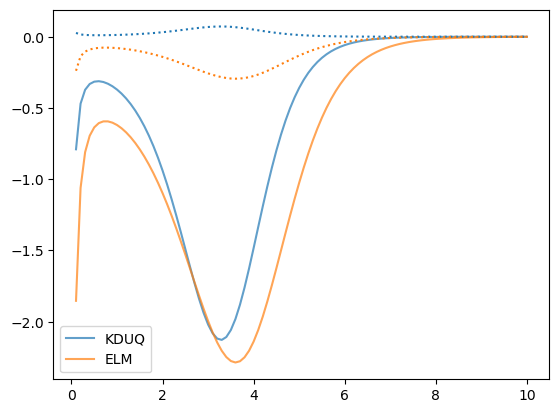

In [32]:
p1, = plt.plot(r, vso_kduq.real, alpha=0.7, label="KDUQ")
p2, = plt.plot(r,vso_elm.real, alpha=0.7,  label="ELM")
plt.plot(r, vso_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vso_elm.imag, ":", color=p2.get_color())

plt.legend()